In [1]:
# Setup Python path and imports
import sys
from pathlib import Path

# Add the project root to Python path
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.append(str(project_root))

# ML toolbox imports
from ml_toolbox.data_loader import DatasetManager, DataLoader

# Initialize dataset manager
dataset_path = project_root / "data_set"
dm = DatasetManager(dataset_path)

# Initialize data loader 
data_loader = DataLoader(dataset_path)

# Get dataset index and statistics
index = dm.get_index()
stats = dm.get_statistics()

print(f"Available conditions: {index['conditions']}")
print(f"Available frequencies: {index['frequencies']}")
print(f"Available loads: {index['loads']}")
print(f"Total files: {stats['total_files']}")

Available conditions: ['faulty_bearing', 'healthy', 'misalignment', 'system_misalignment']
Available frequencies: ['10hz', '20hz', '30hz', '40hz']
Available loads: ['no_load', 'under_load']
Total files: 134


In [2]:
from ml_toolbox.analysis import run_comprehensive_frequency_analysis

# Define frequencies to analyze
frequencies_to_analyze = ["10hz", "20hz", "30hz", "40hz"]
max_windows_per_class = 40  
window_length = 2048 # 10Khz sampling, ~0.2s window

print(f"Analysis Configuration:")
print(f"  Frequencies: {frequencies_to_analyze}")
print(f"  Load condition: no load")
print(f"  Max windows per class: {max_windows_per_class}")
print(f"  Window length: {window_length} samples")
print(f"  Total expected windows: ~{max_windows_per_class * len(frequencies_to_analyze) * 4} (4 classes)")
print("=" * 60)

Analysis Configuration:
  Frequencies: ['10hz', '20hz', '30hz', '40hz']
  Load condition: no load
  Max windows per class: 40
  Window length: 2048 samples
  Total expected windows: ~640 (4 classes)


In [3]:
# Run CV analysis across all frequencies
cv_results = run_comprehensive_frequency_analysis(
    data_loader, 
    frequencies_to_analyze, 
    load="no load",
    max_windows_per_class=max_windows_per_class,
    window_length=window_length,
    export_to_excel=True,
    output_dir="test_output"
)

INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


Starting comprehensive CV analysis for frequencies: ['10hz', '20hz', '30hz', '40hz']
Load condition: no load
Max windows per class: 40
Excel export enabled - output directory: test_output
Loading 10hz no load data...
Loaded 12 current sensor files for 10hz
Created 160 windows for 10hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 10hz
Evaluating model for 10hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


10hz - Mean CV Accuracy: 0.956 ± 0.032
10hz CV analysis completed
Loading 20hz no load data...
Loaded 12 current sensor files for 20hz
Created 160 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 20hz
Evaluating model for 20hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


20hz - Mean CV Accuracy: 0.938 ± 0.028
20hz CV analysis completed
Loading 30hz no load data...
Loaded 12 current sensor files for 30hz
Created 160 windows for 30hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 30hz
Evaluating model for 30hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 11 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 11 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


30hz - Mean CV Accuracy: 0.975 ± 0.036
30hz CV analysis completed
Loading 40hz no load data...
Loaded 11 current sensor files for 40hz
Created 160 windows for 40hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 40hz
Evaluating model for 40hz...
40hz - Mean CV Accuracy: 0.919 ± 0.032
40hz CV analysis completed
CV results written to Excel: test_output/cv_results_no_load.xlsx
Sheets created: CV_Summary, CV_Scores_Detail, Label_Distribution, Analysis_Info
CV analysis completed for 4 frequencies


In [4]:
# Run SHAP analysis across all frequencies
from ml_toolbox.analysis import shap_analysis
from ml_toolbox.analysis import feature_analysis

# Run SHAP analysis for all frequencies with Excel export
oob_results, shap_results, shap_per_class_results = shap_analysis.run_comprehensive_shap_analysis(
    data_loader, 
    frequencies_to_analyze, 
    load="no load",
    max_windows_per_class=max_windows_per_class,
    window_length=window_length,
    window_overlap=0.5,
    export_to_excel=True,
    output_dir="test_output"
)

INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


Starting comprehensive SHAP analysis for frequencies: ['10hz', '20hz', '30hz', '40hz']
Load condition: no load
Max windows per class: 40
CV folds: 5
Per-class analysis: Enabled
Excel export enabled - output directory: test_output
Loading 10hz no load data...
Loaded 12 current sensor files for 10hz
Created 160 windows for 10hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 10hz
Computing feature importance for 10hz...
Computing SHAP importance for 10hz...
Computing SHAP values across 5 folds...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
Computing per-class SHAP analysis for 10hz...
Computing per-class SHAP importance for 10hz...
Computing per-class SHAP values across 5 folds for 4 classes...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5


INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


Per-class SHAP results written to Excel: test_output/shap_per_class_10hz_no_load.xlsx
Classes analyzed: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Sheets created: Class_Summary, individual class details, Top_Features_by_Class, Feature_Ranking_Matrix, Analysis_Info
10hz analysis completed
Loading 20hz no load data...
Loaded 12 current sensor files for 20hz
Created 160 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 20hz
Computing feature importance for 20hz...
Computing SHAP importance for 20hz...
Computing SHAP values across 5 folds...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
Computing per-class SHAP analysis for 20hz...
Computing per-class SHAP importance for 20hz...
Computing per-class SHAP values across 5 folds for 4 classes...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5


INFO:ml_toolbox.data_loader.data_loader:Loading 12 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 12 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


Per-class SHAP results written to Excel: test_output/shap_per_class_20hz_no_load.xlsx
Classes analyzed: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Sheets created: Class_Summary, individual class details, Top_Features_by_Class, Feature_Ranking_Matrix, Analysis_Info
20hz analysis completed
Loading 30hz no load data...
Loaded 12 current sensor files for 30hz
Created 160 windows for 30hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 30hz
Computing feature importance for 30hz...
Computing SHAP importance for 30hz...
Computing SHAP values across 5 folds...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
Computing per-class SHAP analysis for 30hz...
Computing per-class SHAP importance for 30hz...
Computing per-class SHAP values across 5 folds for 4 classes...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5


INFO:ml_toolbox.data_loader.data_loader:Loading 11 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 11 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'healthy': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 40 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/160 windows


Per-class SHAP results written to Excel: test_output/shap_per_class_30hz_no_load.xlsx
Classes analyzed: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Sheets created: Class_Summary, individual class details, Top_Features_by_Class, Feature_Ranking_Matrix, Analysis_Info
30hz analysis completed
Loading 40hz no load data...
Loaded 11 current sensor files for 40hz
Created 160 windows for 40hz


INFO:ml_toolbox.data_loader.feature_extraction:Processed 100/160 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 160 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 40hz
Computing feature importance for 40hz...
Computing SHAP importance for 40hz...
Computing SHAP values across 5 folds...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
Computing per-class SHAP analysis for 40hz...
Computing per-class SHAP importance for 40hz...
Computing per-class SHAP values across 5 folds for 4 classes...
Processing fold 1/5
Processing fold 2/5
Processing fold 3/5
Processing fold 4/5
Processing fold 5/5
Per-class SHAP results written to Excel: test_output/shap_per_class_40hz_no_load.xlsx
Classes analyzed: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Sheets created: Class_Summary, individual class details, Top_Features_by_Class, Feature_Ranking_Matrix, Analysis_Info
40hz analysis completed
OOB vs SHAP comparison written to Excel: test_output/oob_vs_shap_comparison_no_load.xlsx
Sheets created: Comparison_Summary, individual frequency comparisons, SHAP_Summary, Analysis_Info
SHAP 

PERFORMANCE SUMMARY ACROSS FREQUENCIES
Frequency  Mean_Accuracy  Std_Accuracy  Best_Fold  Worst_Fold  Stability_Score  N_Samples  N_Features
     30hz        0.97500      0.036443    1.00000     0.90625        26.753772        160         112
     10hz        0.95625      0.031869    1.00000     0.90625        30.005759        160         112
     20hz        0.93750      0.027951    0.96875     0.90625        33.541008        160         112
     40hz        0.91875      0.031869    0.96875     0.87500        28.829063        160         112

CROSS-VALIDATION ANALYSIS


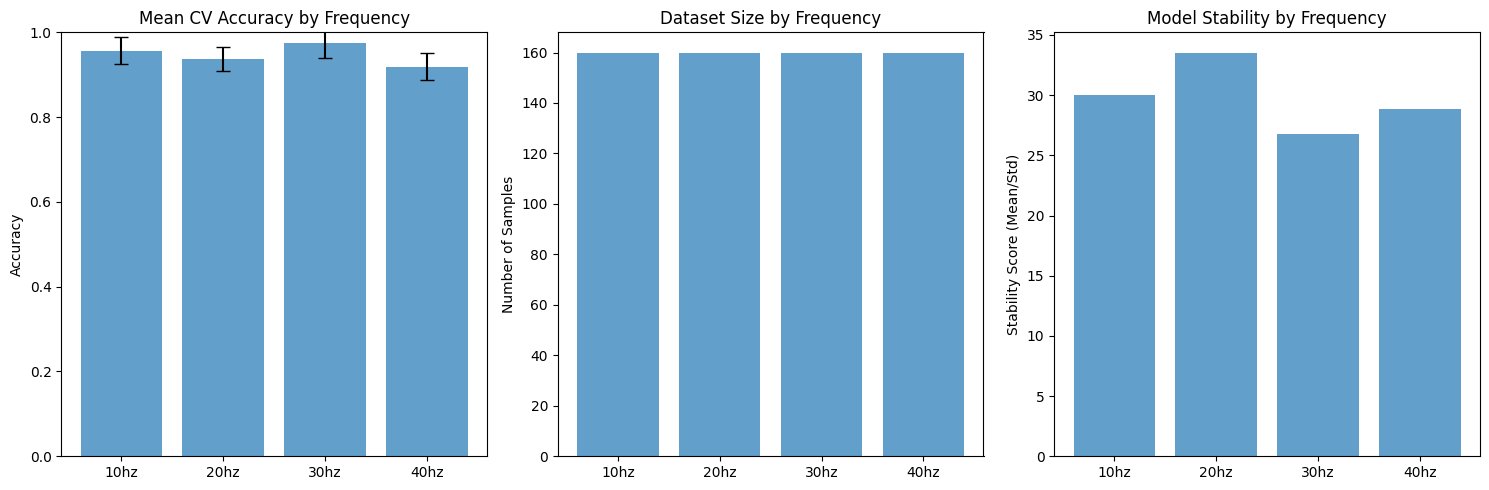

In [5]:
# Display comprehensive results
from ml_toolbox.analysis import (
    plot_cv_results_comparison, 
    create_performance_summary
)

# 1. Performance Summary Table
print("PERFORMANCE SUMMARY ACROSS FREQUENCIES")
print("=" * 60)
performance_summary = create_performance_summary(cv_results)
print(performance_summary.to_string(index=False))

# 2. Plot comprehensive CV results comparison
print("\nCROSS-VALIDATION ANALYSIS")
plot_cv_results_comparison(cv_results)

CV SCORES BY FOLD FOR EACH FREQUENCY


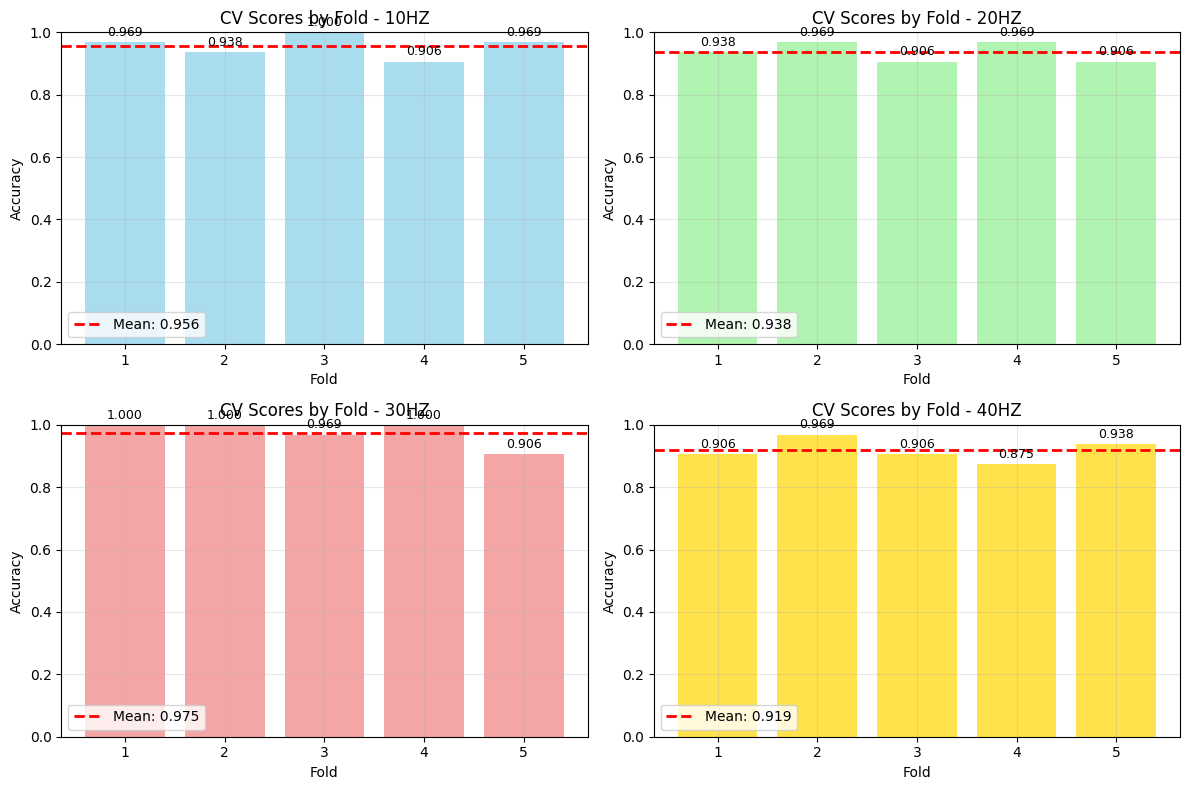

In [6]:
from ml_toolbox.analysis import plot_cv_scores_by_fold

print("CV SCORES BY FOLD FOR EACH FREQUENCY")
print("=" * 60)
plot_cv_scores_by_fold(cv_results)

FEATURE IMPORTANCE ANALYSIS RESULTS

TOP 10 SHAP FEATURES BY FREQUENCY:

10HZ:
   1. current_phase_a_std       | SHAP: 0.0263 ± 0.0010
   2. current_phase_b_var       | SHAP: 0.0246 ± 0.0015
   3. current_phase_b_rms       | SHAP: 0.0243 ± 0.0014
   4. current_phase_a_iqr       | SHAP: 0.0202 ± 0.0008
   5. current_phase_a_var       | SHAP: 0.0194 ± 0.0011
   6. current_phase_b_std       | SHAP: 0.0193 ± 0.0011
   7. current_phase_a_rms       | SHAP: 0.0187 ± 0.0018
   8. current_phase_b_log_energy | SHAP: 0.0180 ± 0.0013
   9. current_phase_b_percentile_25 | SHAP: 0.0178 ± 0.0019
  10. current_phase_b_power     | SHAP: 0.0173 ± 0.0018

20HZ:
   1. current_phase_a_std       | SHAP: 0.0245 ± 0.0016
   2. current_phase_b_var       | SHAP: 0.0217 ± 0.0010
   3. current_phase_b_rms       | SHAP: 0.0209 ± 0.0009
   4. current_phase_a_rms       | SHAP: 0.0192 ± 0.0023
   5. current_phase_b_std       | SHAP: 0.0186 ± 0.0011
   6. current_phase_b_log_energy | SHAP: 0.0173 ± 0.0010
   7. curren

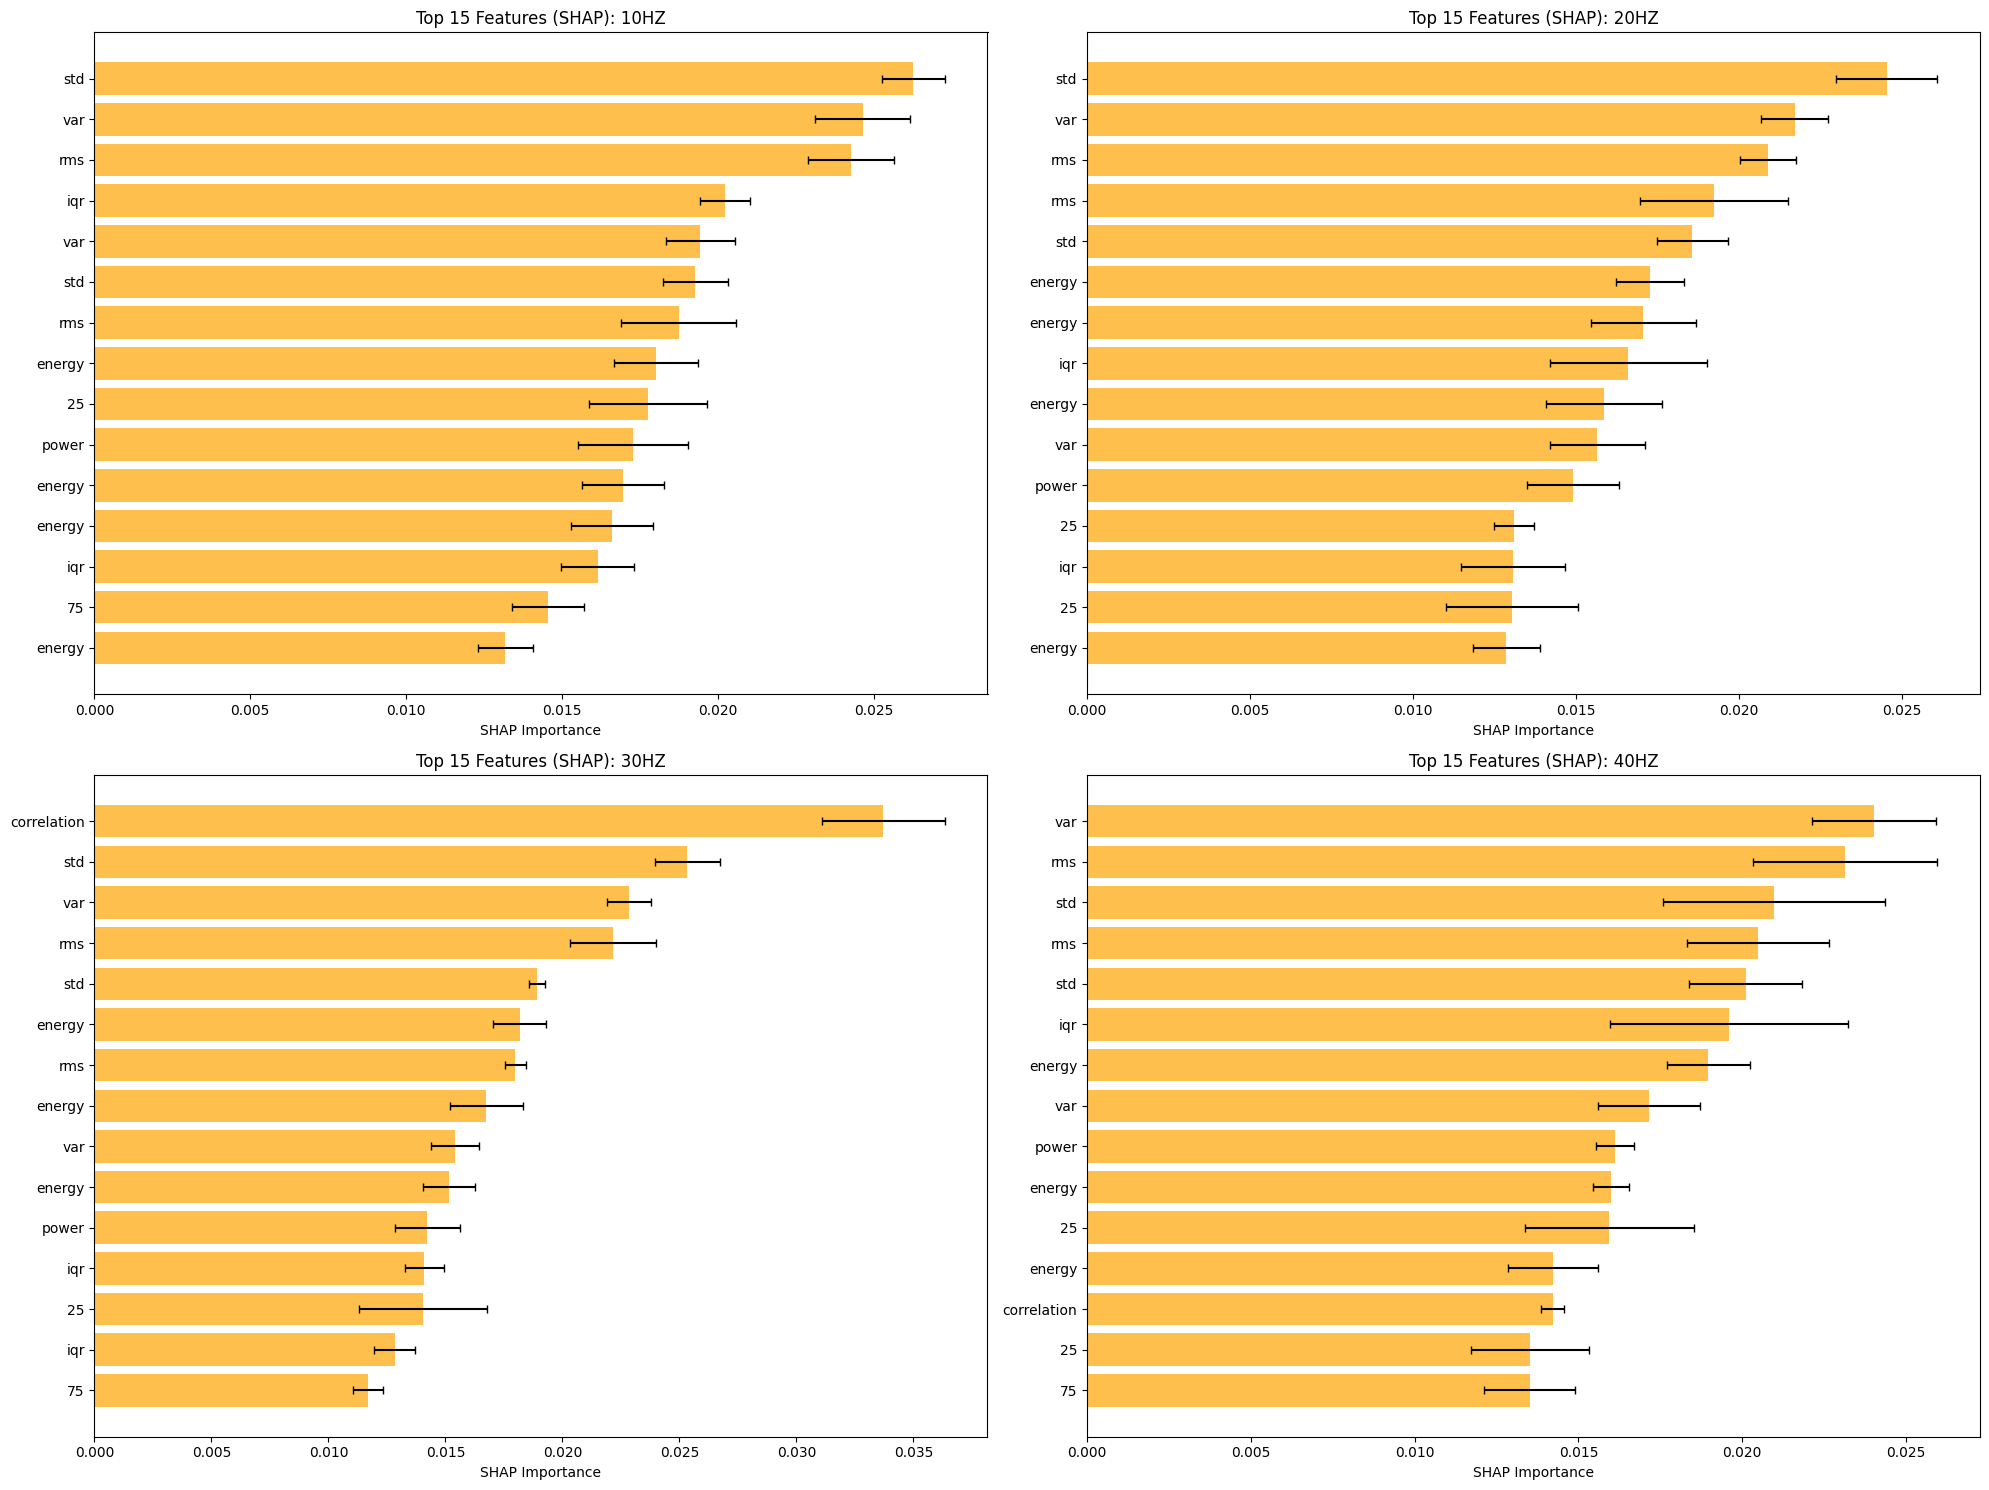


MDI FEATURE IMPORTANCE VISUALIZATION


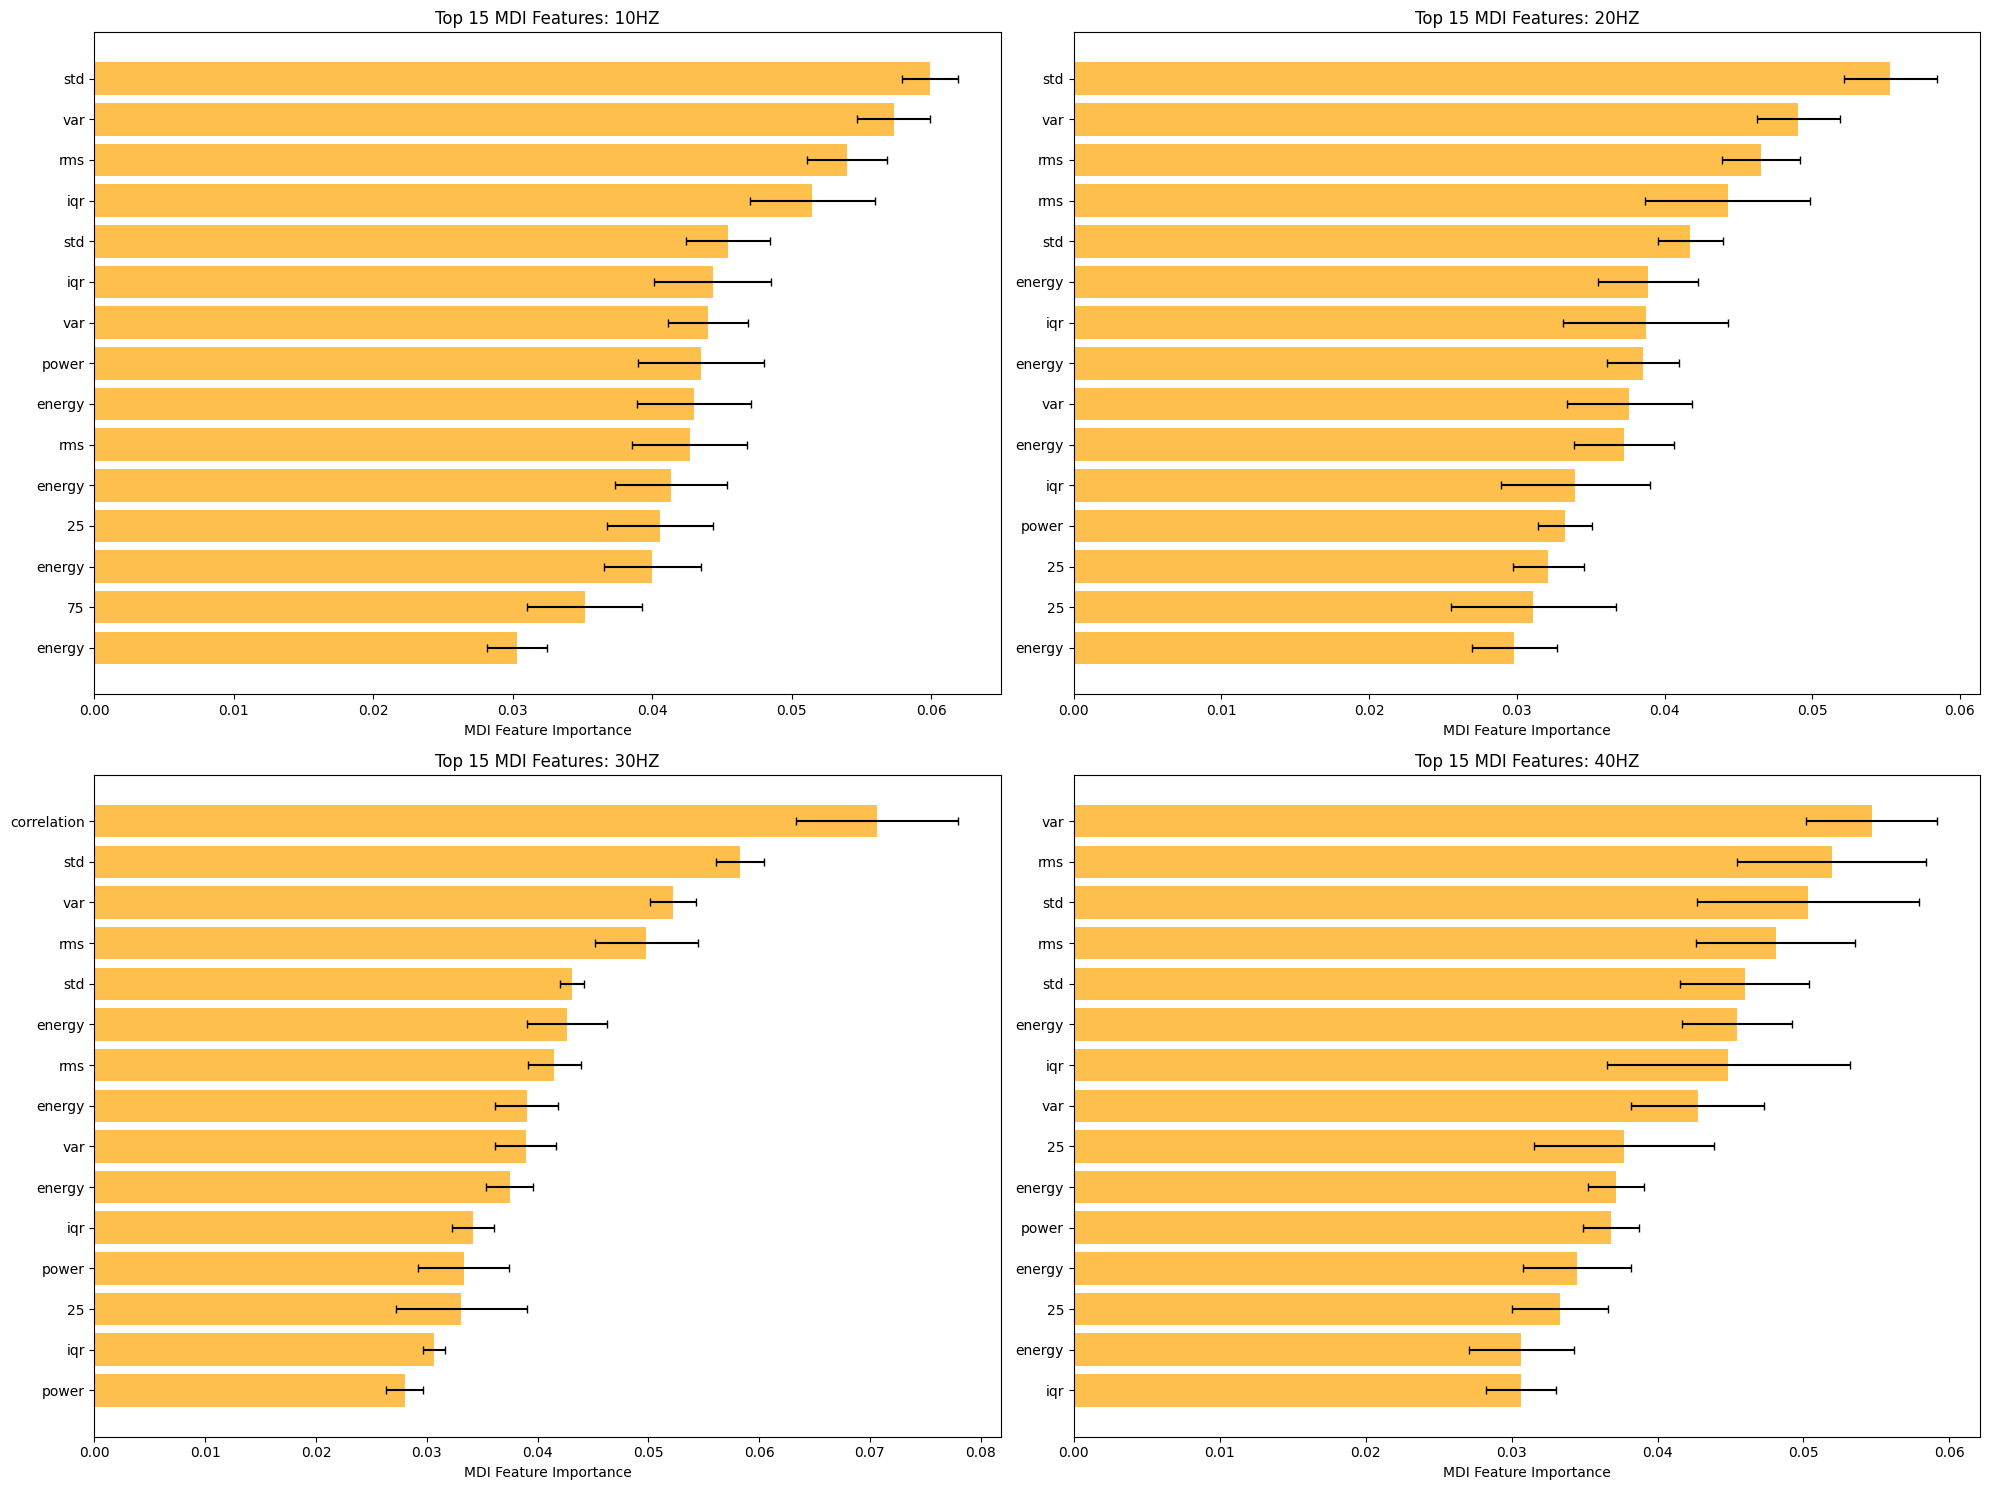


PM FEATURE IMPORTANCE VISUALIZATION


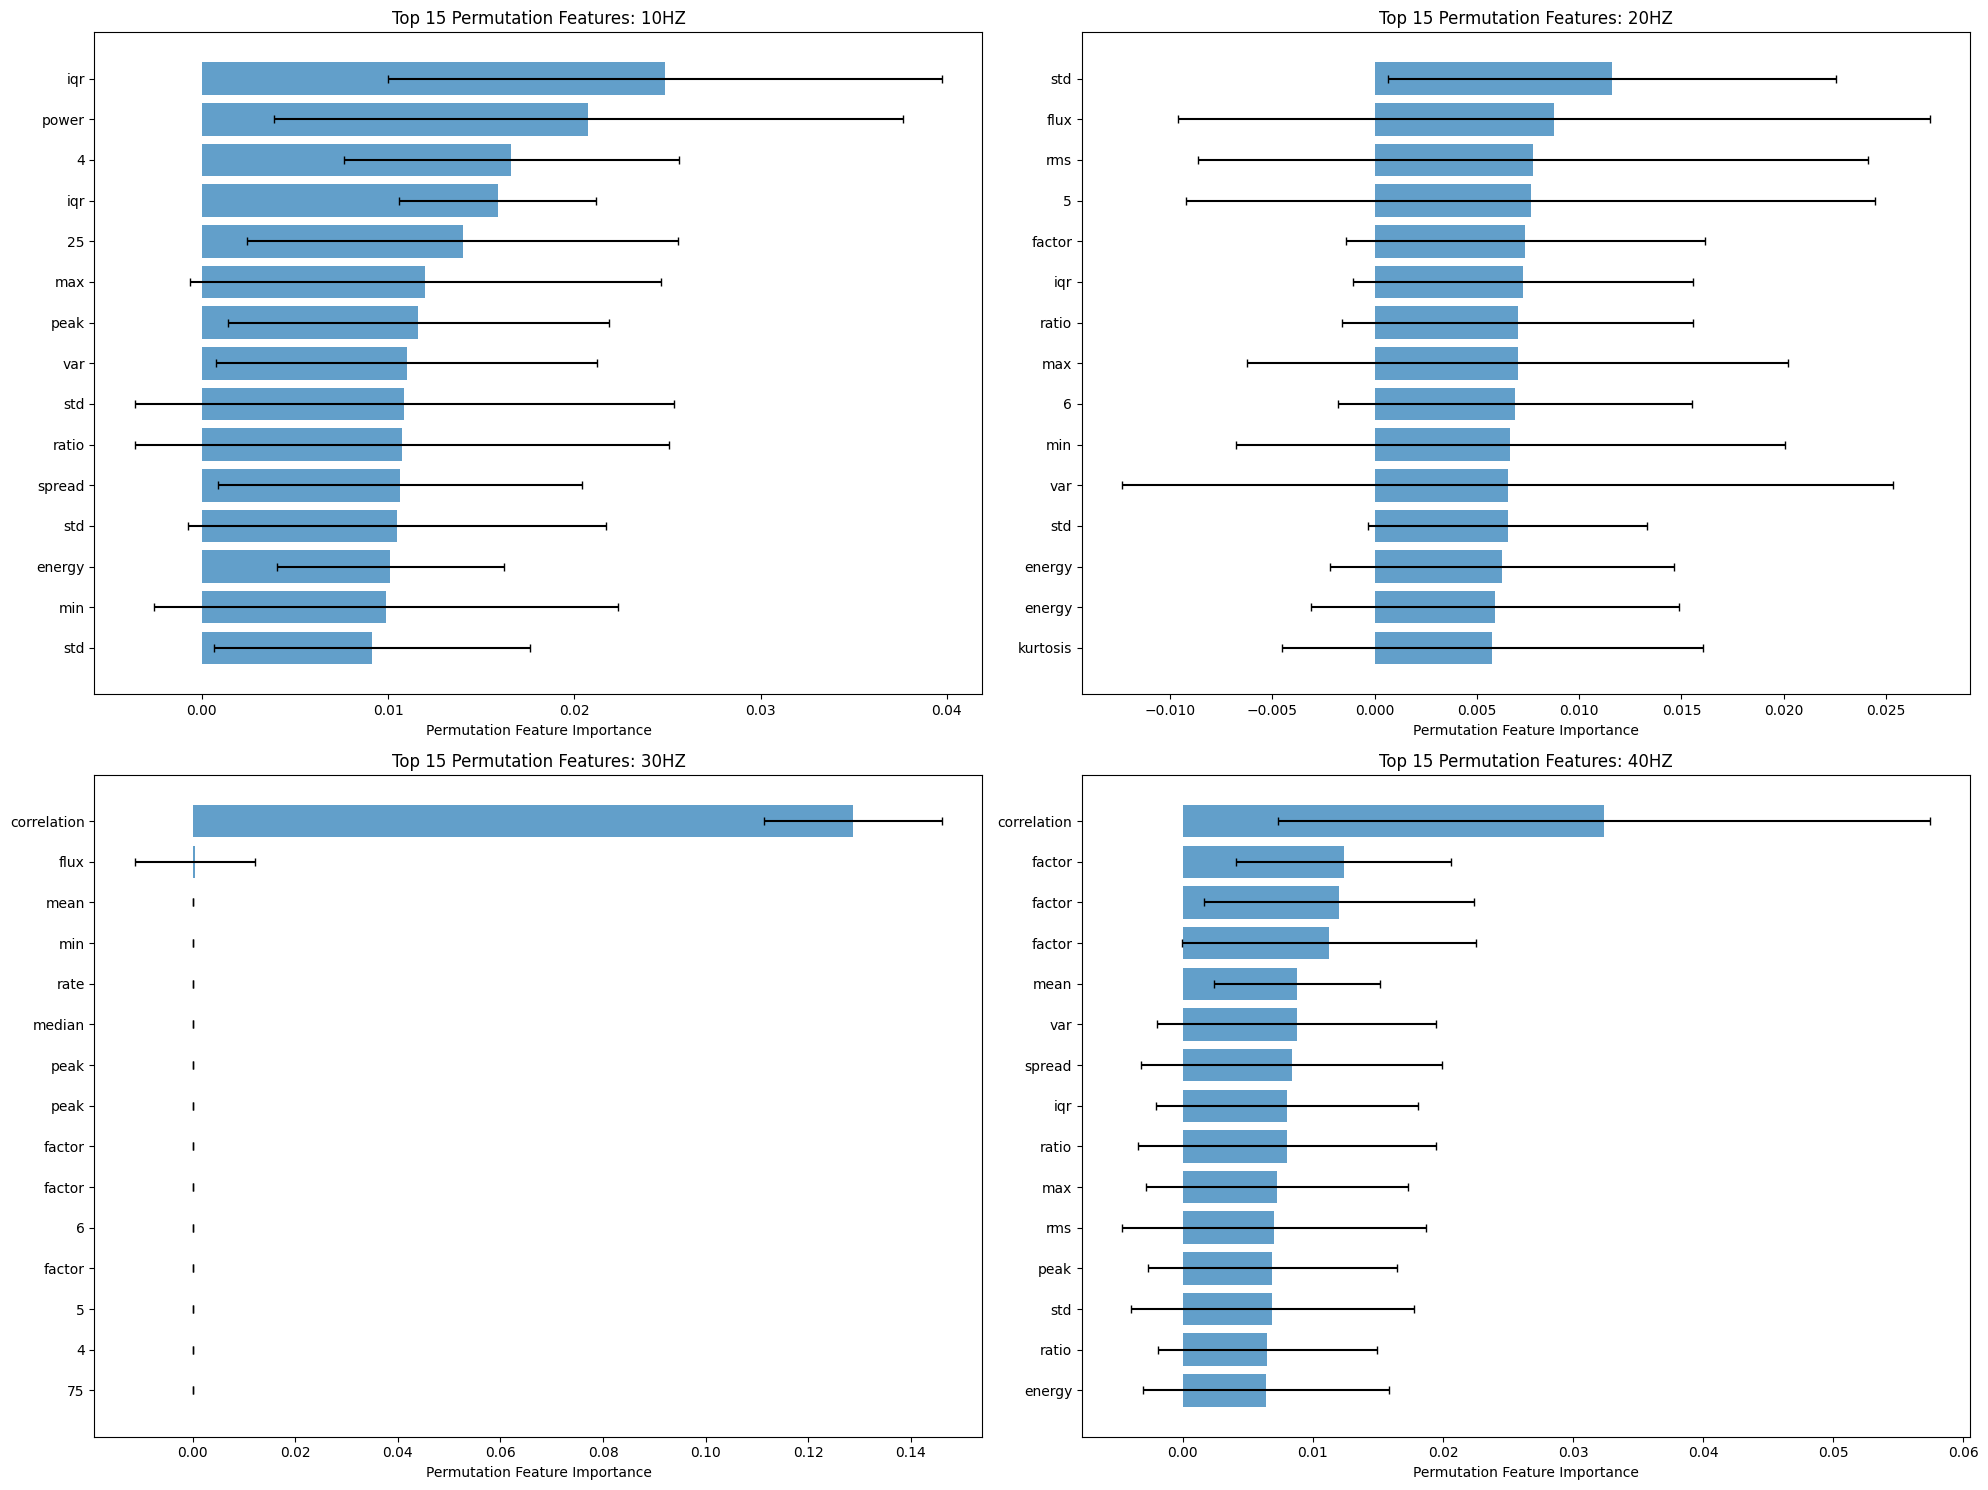


PM vs SHAP COMPARISON FOR 20HZ:
   Importance correlation: 0.331
   Mean agreement score: 0.105


In [7]:
# Feature importance analysis results from SHAP
print("FEATURE IMPORTANCE ANALYSIS RESULTS")
print("=" * 60)

# 1. Show top SHAP features for each frequency
print("\nTOP 10 SHAP FEATURES BY FREQUENCY:")
for freq in frequencies_to_analyze:
    if freq in shap_results:
        print(f"\n{freq.upper()}:")
        top_10 = shap_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | SHAP: {row['Mean_SHAP_Importance']:.4f} ± {row['Std_SHAP_Importance']:.4f}")

# 1.5 Show top MDI features for comparison
print(f"\nTOP 10 MDI FEATURES BY FREQUENCY:")
for freq in frequencies_to_analyze:
    if freq in oob_results:
        print(f"\n{freq.upper()}:")
        top_10 = oob_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | MDI: {row['Mean_MDI_Importance']:.4f} ± {row['Std_MDI_Importance']:.4f}")

# 2. Show top PM features for comparison
print(f"\nTOP 10 PM FEATURES BY FREQUENCY:")
for freq in frequencies_to_analyze:
    if freq in oob_results:
        print(f"\n{freq.upper()}:")
        top_10 = oob_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | PM: {row['Mean_Importance']:.4f} ± {row['Std_Importance']:.4f}")

# 3. Plot SHAP importance comparison
print(f"\nSHAP FEATURE IMPORTANCE VISUALIZATION")
shap_analysis.plot_shap_importance_comparison(shap_results, top_n=15)

# Plot MDI importance comparison
print(f"\nMDI FEATURE IMPORTANCE VISUALIZATION")
feature_analysis.plot_mdi_importance_comparison(oob_results, top_n=15)

# Plot PM importance comparison 
print(f"\nPM FEATURE IMPORTANCE VISUALIZATION")
feature_analysis.plot_permuted_importance_comparison(oob_results, top_n=15)

# 4. Compare PM vs SHAP for one frequency as example
if "20hz" in oob_results and "20hz" in shap_results:
    print(f"\nPM vs SHAP COMPARISON FOR 20HZ:")
    comparison_example = shap_analysis.compare_oob_vs_shap_importance(oob_results["20hz"], shap_results["20hz"])
    correlation = comparison_example['OOB_Normalized'].corr(comparison_example['SHAP_Normalized'])
    print(f"   Importance correlation: {correlation:.3f}")
    print(f"   Mean agreement score: {comparison_example['Agreement_Score'].mean():.3f}")